In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../datasets/FuelConsumption.csv")

In [3]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [12]:
df.MODEL.value_counts()

MODEL
F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50                      1
SONATA HYBRID LIMITED    1
SONATA HYBRID            1
XC90 AWD                 1
Name: count, Length: 663, dtype: int64

In [17]:
df.FUELTYPE.value_counts()

FUELTYPE
X    514
Z    434
E     92
D     27
Name: count, dtype: int64

In [13]:
df.VEHICLECLASS.value_counts()

VEHICLECLASS
MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: count, dtype: int64

In [14]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [19]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELTYPE', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELTYPE,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,Z,196
1,2.4,4,11.2,7.7,9.6,Z,221
2,1.5,4,6.0,5.8,5.9,Z,136
3,3.5,6,12.7,9.1,11.1,Z,255
4,3.5,6,12.1,8.7,10.6,Z,244


In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['FUELTYPE']

for column in categorical_columns:
    cdf[column] = label_encoder.fit_transform(cdf[column])

/var/folders/fx/6b3rqt05157bfs8qr3tjb5zc0000gn/T/ipykernel_6125/1195805091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf[column] = label_encoder.fit_transform(cdf[column])


In [22]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELTYPE,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,3,196
1,2.4,4,11.2,7.7,9.6,3,221
2,1.5,4,6.0,5.8,5.9,3,136
3,3.5,6,12.7,9.1,11.1,3,255
4,3.5,6,12.1,8.7,10.6,3,244


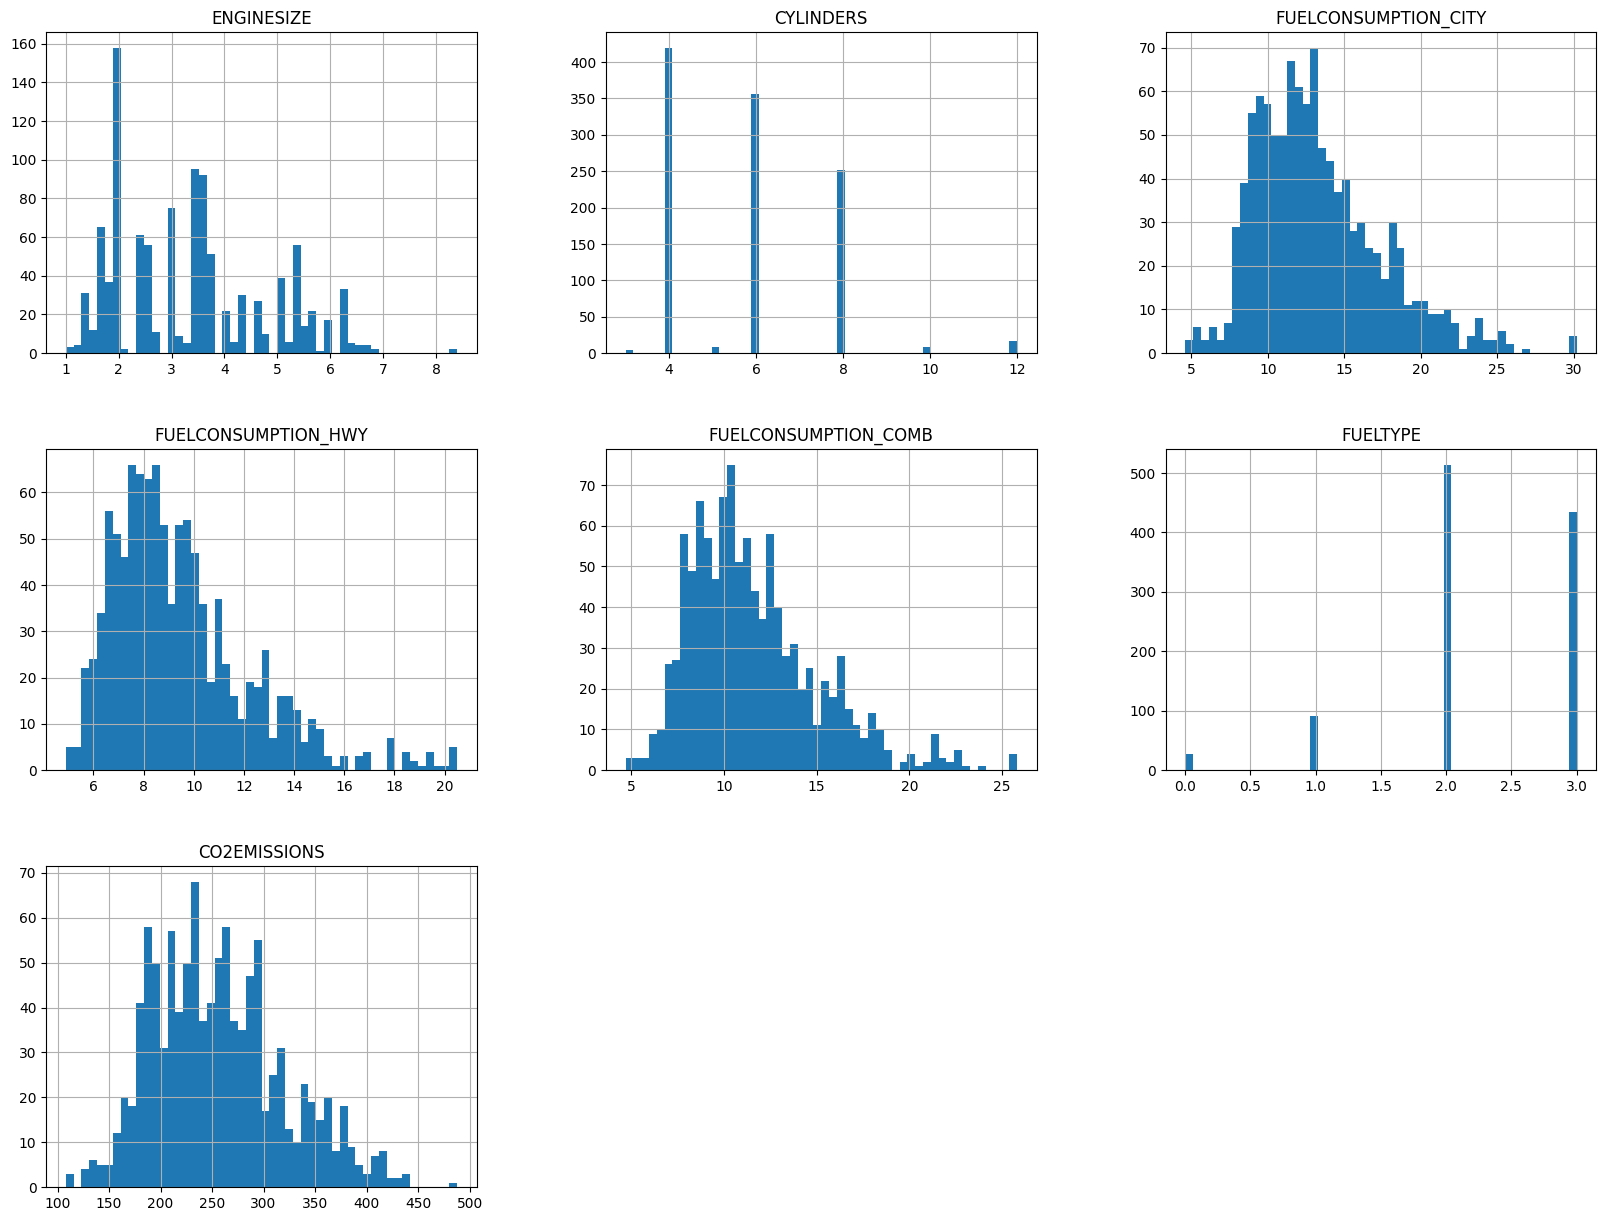

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
cdf.hist(bins=50, figsize=(20,15))
plt.show()

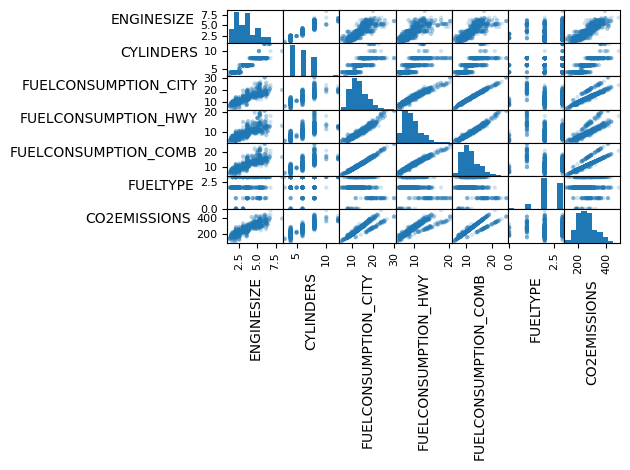

In [24]:
axes = pd.plotting.scatter_matrix(cdf, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0,hspace=0)
plt.show()

In [25]:
corr_matrix = cdf.corr()

In [26]:
corr_matrix['CO2EMISSIONS']

ENGINESIZE              0.874154
CYLINDERS               0.849685
FUELCONSUMPTION_CITY    0.898039
FUELCONSUMPTION_HWY     0.861748
FUELCONSUMPTION_COMB    0.892129
FUELTYPE                0.075167
CO2EMISSIONS            1.000000
Name: CO2EMISSIONS, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x13fbf16d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13fbf1950>,
 'boxes': [<matplotlib.lines.Line2D at 0x13fbf1590>],
 'medians': [<matplotlib.lines.Line2D at 0x13fbf1bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13fbf1d10>],
 'means': []}

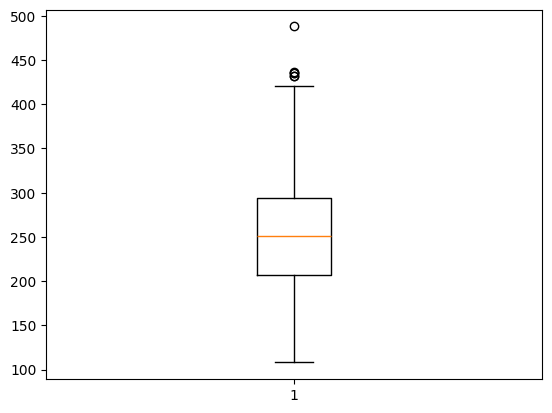

In [27]:
plt.boxplot(cdf['CO2EMISSIONS'])

## preparando os dados

In [28]:
X = cdf.drop(['CO2EMISSIONS'], axis=1)
y = cdf['CO2EMISSIONS']
print(X.shape)
print(y.shape)

(1067, 6)
(1067,)


## dividir dados de treino e teste

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Regressão linear

In [46]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
print ('Coefficients: ', lasso_model.coef_)

Coefficients:  [10.32074043  4.61765183  4.63022081  2.89231399  3.42543908 10.91254535]


In [47]:
y_pred_lasso = lasso_model.predict(X_test)

In [48]:
# avaliando o modelo
from sklearn.metrics import mean_squared_error, r2_score
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(lasso_mse, lasso_r2)

462.2571764397399 0.8882071899792173


## ÁRVORE DE DECISÃO

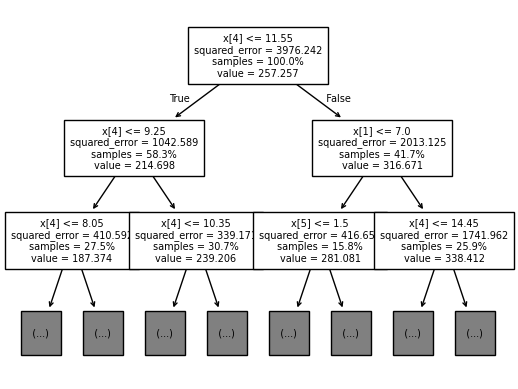

In [49]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree.plot_tree(tree_model, proportion=True, max_depth=2, fontsize=7)
plt.show()

In [52]:
y_pred_tree = tree_model.predict(X_test)

In [53]:
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
print(tree_mse, tree_r2)

127.19158878504673 0.9692398391068746


In [59]:
tree_results = pd.DataFrame(['AD Regressor', tree_mse, tree_r2]).transpose()
tree_results.columns = ["Method", "MSE", "R2"]

lasso_results = pd.DataFrame(['Lasso Regressor', lasso_mse, lasso_r2]).transpose()
lasso_results.columns = ["Method", "MSE", "R2"]

In [61]:
df_results = pd.concat([tree_results, lasso_results]).reset_index()
df_results

,index,Method,MSE,R2
0,0,AD Regressor,127.191589,0.96924
1,0,Lasso Regressor,462.257176,0.888207
